In [1]:
# Read and structure experiment data csv
import csv
import numpy as np

exp_data = []
num_max_traders = 32

filenamestr='100_randoms_exp_2.csv'
exp_data = {}
exp_data["base"] = []
exp_data["enhanced"] = []
with open(filenamestr) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0

    for row in csv_reader:
        subtrial = {}
        if line_count == 0:
            line_count += 1
        else:
            # subtrial{trial_id, duration, AA{}, GDX{}, ZIP{}, SNPR{}}
            subtrial["trial_id"] = row[0]
            subtrial["duration"] = row[1]
            csv_column_offset   = 2
            num_cols_per_trader = 4
            sum_trader_nums = 0
            j = 0
            # trader_stats{balance, num_traders, profit_per}
            while sum_trader_nums < num_max_traders:
                row_id = j * num_cols_per_trader + csv_column_offset
                trader_type                 = row[row_id]
                trader_stats = {}
                trader_stats["balance"]     = float(row[row_id + 1])
                if row[row_id + 2] == ' ':
                    trader_stats["num_traders"] = 0
                else:
                    trader_stats["num_traders"] = int(row[row_id + 2])
                sum_trader_nums += trader_stats["num_traders"]
                trader_stats["profit_per"]  = float(row[row_id + 3])
                subtrial[trader_type] = trader_stats
                j += 1

            line_count += 1
        if (line_count - 1) % 2 == 1 and line_count > 1:
            exp_data["base"].append(subtrial)
        elif line_count > 1: 
            exp_data["enhanced"].append(subtrial)
# Reference guide to experiment data structure:
# exp_data[s_d_schedule_num]["base/enhanced"][trial_num]["trial_id/duration/AA/GDX/ZIP/SNPR"]['profit_per']
# if trader_code last field is a dict [balance/num_traders/profit_per]
print('Reading in completed.')

Reading in completed.


In [2]:
avg_enhanced_profit  = []
avg_all_profit       = []
avg_even_prob_profit = []
enhanced_types       = []
best_trial_types     = []
order_schedule_num   = []
avg_extra_profit     = []
real_best_profit     = []
types = [" AA", " GDX", " ZIP", " SNPR"]
types_without_spaces = ["AA", "GDX", "ZIP", "SNPR"]



en_current_exp_data = exp_data["enhanced"]
ba_current_exp_data = exp_data["base"]
for en in en_current_exp_data:
    enhanced_type = ''
    best_trial_type = ''
    list_index = en_current_exp_data.index(en)
    ba = ba_current_exp_data[list_index]
    ba_trader_nums = []
    en_trader_nums = []
    tot_trader_num = 0
    aap  = 0
    max_avg_profit_per = -9999
    max_trial_profit_per = -9999
    # Determine enhanced trader and best-in-real-trial type from profits
    for tr_type in types:
        try: 
            if (en[tr_type]["profit_per"] > max_trial_profit_per):
                best_trial_type = tr_type
                max_trial_profit_per = en[tr_type]["profit_per"]
            if (ba[tr_type]["profit_per"] > max_avg_profit_per):
                enhanced_type = tr_type
                max_avg_profit_per = ba[tr_type]["profit_per"]
        except KeyError:
            pass
    enhanced_types.append(enhanced_type)
    best_trial_types.append(best_trial_type)
    # Use type information to append data to the right lists
    for tr_type in types:
        try: 
#             ba_trader_nums.append(ba[tr_type]["num_traders"])
#             en_trader_nums.append(en[tr_type]["num_traders"])
            tot_trader_num += int(ba[tr_type]["num_traders"])
            aap  += float(ba[tr_type]["balance"])
        except KeyError:
            pass
    real_best_profit.append(max_trial_profit_per)
    avg_enhanced_profit.append(en[enhanced_type]["profit_per"])
    avg_all_profit.append((aap / tot_trader_num))
       
for i in range (0, 45500):
    # // performs integer division: quotient without remainder
    order_schedule_num.append(i // 455)

def type_to_colour(typestring):
    aa_colour   = '#b95a00' # Brown
    gdx_colour  = '#a900df' # Purple
    zip_colour  = '#087e3e' # Dark green
    snpr_colour = '#ff0000' # Red
    if typestring   == ' AA' :
        return aa_colour
    elif typestring == ' GDX':
        return gdx_colour
    elif typestring == ' ZIP':
        return zip_colour
    else:
        return snpr_colour
    
enhanced_types_colours = list(map(type_to_colour, enhanced_types))
type_sorted_aep  = {}
type_sorted_aap  = {}
# type_sorted_aepp = {}
type_sorted_osn  = {}
type_sorted_aep['AA']   = []
type_sorted_aep['GDX']  = []
type_sorted_aep['ZIP']  = []
type_sorted_aep['SNPR'] = []
type_sorted_aap['AA']   = []
type_sorted_aap['GDX']  = []
type_sorted_aap['ZIP']  = []
type_sorted_aap['SNPR'] = []
# type_sorted_aepp['AA']   = []
# type_sorted_aepp['GDX']  = []
# type_sorted_aepp['ZIP']  = []
# type_sorted_aepp['SNPR'] = []
type_sorted_osn['AA']   = []
type_sorted_osn['GDX']  = []
type_sorted_osn['ZIP']  = []
type_sorted_osn['SNPR'] = []

i = 0
for x in avg_enhanced_profit:
    trial_index = avg_enhanced_profit.index(x)
    if enhanced_types[i] == ' AA':
        type_sorted_aep['AA'].append(x)
        type_sorted_osn['AA'].append(order_schedule_num[trial_index])
    elif enhanced_types[i] == ' GDX':
        type_sorted_aep['GDX'].append(x)
        type_sorted_osn['GDX'].append(order_schedule_num[trial_index])
    elif enhanced_types[i] == ' ZIP':
        type_sorted_aep['ZIP'].append(x)
        type_sorted_osn['ZIP'].append(order_schedule_num[trial_index])
    else:
        type_sorted_aep['SNPR'].append(x)
        type_sorted_osn['SNPR'].append(order_schedule_num[trial_index])
    i += 1
    
i = 0
for x in avg_all_profit:
    if enhanced_types[i] == ' AA':
        type_sorted_aap['AA'].append(x)
    elif enhanced_types[i] == ' GDX':
        type_sorted_aap['GDX'].append(x)
    elif enhanced_types[i] == ' ZIP':
        type_sorted_aap['ZIP'].append(x)
    else:
        type_sorted_aap['SNPR'].append(x)
    i += 1
    
# i = 0
# for x in avg_even_prob_profit:
#     if enhanced_types[i] == ' AA':
#         type_sorted_aepp['AA'].append(x)
#     elif enhanced_types[i] == ' GDX':
#         type_sorted_aepp['GDX'].append(x)
#     elif enhanced_types[i] == ' ZIP':
#         type_sorted_aepp['ZIP'].append(x)
#     else:
#         type_sorted_aepp['SNPR'].append(x)
#     i += 1

print('Data sorted and ranked.')

Data sorted and ranked.


1.2749874866057342 -0.00014440499132027497


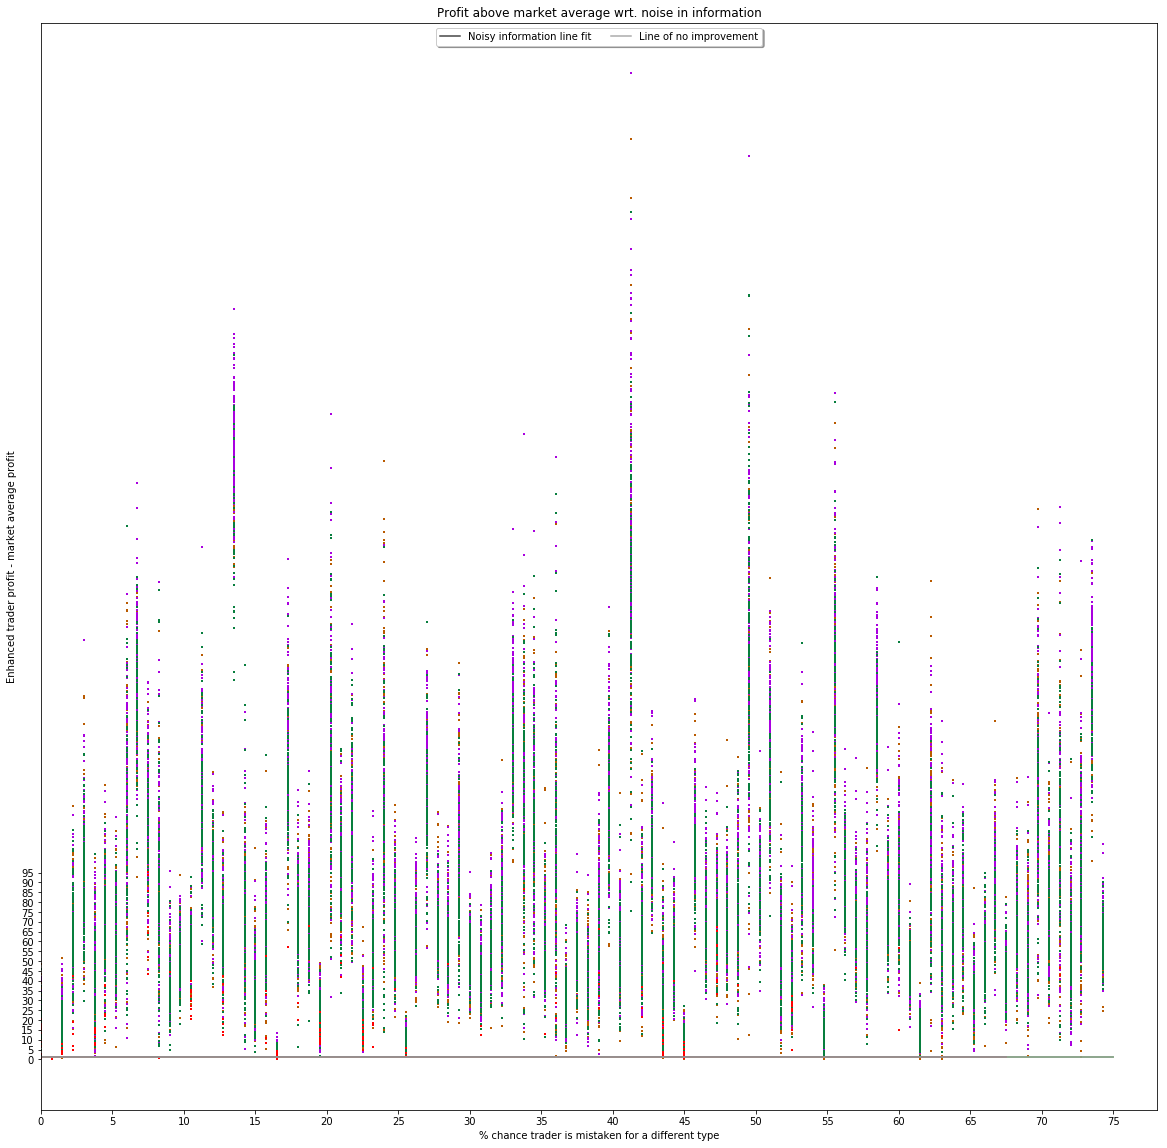

In [24]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
    

noise_coefficient = 0.75    
equal_line_x = [0, 75]
equal_line_y = [1, 1]

avg_extra_profit = [i / j for i, j in zip(avg_enhanced_profit, avg_all_profit) if j != 0]
type_sorted_ex_p = {}
for t in types_without_spaces:
    type_sorted_ex_p[t] = [i / j for i, j in zip(type_sorted_aep[t], type_sorted_aap[t]) if j != 0]

linreg_array_x = np.array([x * noise_coefficient for (x, y) in zip(order_schedule_num, avg_all_profit) if y!= 0])
linreg_array_y = np.array(avg_extra_profit.copy())
coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
coeff_line_y = [coeffs[1], coeffs[1] + 75*coeffs[0]]
coeff_line_x = [0, 75-7.5]
print(coeffs[1], coeffs[0])



plt.figure(figsize=(20,20))
plt.xticks(range(0,80,5))
plt.yticks(np.arange(0, 100, step=5))
sc_marker = '+'
sc_marker_size=4
x_values = [x * noise_coefficient for (x, y) in zip(order_schedule_num, avg_all_profit) if y!= 0]
y_values = [min(y,5) for y in avg_all_profit if y!= 0]
# aa_dots = plt.scatter(x_values, y_values, sc_marker_size, marker=sc_marker)
aa_dots = plt.scatter(  [ 0.75 * x for x in type_sorted_osn['AA']],   type_sorted_aep['AA'],   sc_marker_size, c='#b95a00', marker=sc_marker)
zip_dots = plt.scatter( [ 0.75 * x for x in type_sorted_osn['GDX']],  type_sorted_aep['GDX'],  sc_marker_size, c='#a900df', marker=sc_marker)
gdx_dots = plt.scatter( [ 0.75 * x for x in type_sorted_osn['ZIP']],  type_sorted_aep['ZIP'],  sc_marker_size, c='#087e3e', marker=sc_marker)
snpr_dots = plt.scatter([ 0.75 * x for x in type_sorted_osn['SNPR']], type_sorted_aep['SNPR'], sc_marker_size, c='#ff0000', marker=sc_marker)
plt.title("Profit above market average wrt. noise in information")
plt.ylabel("Enhanced trader profit - market average profit")
plt.xlabel("% chance trader is mistaken for a different type")
#plt.ylim(bottom=1)
plt.xlim(left=0)
plt.plot(equal_line_x, equal_line_y, c="g")
plt.plot(coeff_line_x, coeff_line_y, c='r')
# Add legend
# lgnd = plt.legend((aa_dots, zip_dots, gdx_dots, snpr_dots),
#            ('AA', 'GDX', 'ZIP', 'SNPR'), fontsize = 12)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]
# lgnd.legendHandles[3]._sizes = [30]
ax = plt.subplot(111)
ax.plot(coeff_line_x, coeff_line_y, label='Noisy information line fit', c="#444444")
ax.plot(equal_line_x, equal_line_y, label='Line of no improvement',     c='#aaaaaa')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
# ax.add_artist(lgnd)
plt.show()
    
    

0.00028379119417324463
1.2223143832261014 0.00028379119417324804


/home/bmiki/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


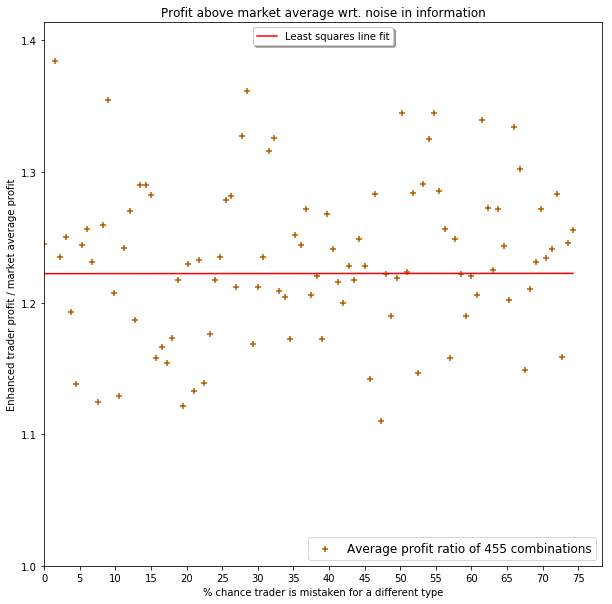

In [13]:
schedule_averaged_x = []
schedule_averaged_y = []
# Average every 455 trials - same schedule, same noise, for easier display
for schedule_id in range(0, 100):
    aep_avg  = 0
    aap_avg  = 0
    for ratio in range(0, 455):
        aap_avg += avg_all_profit[(schedule_id * 455) + ratio]
        aep_avg += avg_enhanced_profit[(schedule_id * 455) + ratio]
    if (aap_avg != 0):
        schedule_averaged_x.append(schedule_id * noise_coefficient)
        schedule_averaged_y.append((aep_avg / aap_avg))
        
lr = LinearRegression(fit_intercept=True)
linreg_enhanced_list = schedule_averaged_x.copy()
linreg_enhanced_array = np.array(linreg_enhanced_list)
linreg_enhanced_array = linreg_enhanced_array.reshape(-1, 1)
lr.fit(linreg_enhanced_array, schedule_averaged_y)
least_squares_coeff = lr.coef_[0]
coeff_line_x = [0, 75]
coeff_line_y = [lr.intercept_, lr.intercept_* (1 + least_squares_coeff)]
print(least_squares_coeff)


linreg_array_x = np.array(schedule_averaged_x)
linreg_array_y = np.array(schedule_averaged_y.copy())
coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
coeff_line_y = [coeffs[1], coeffs[1] + 0.75*coeffs[0]]
coeff_line_x = [0, 75-0.75]
print(coeffs[1], coeffs[0])


plt.figure(figsize=(10,10))
plt.xticks(range(0,80,5))
plt.yticks(np.arange(0, 3, step=0.1))
sc_marker = '+'
sc_marker_size=28
dots = plt.scatter( schedule_averaged_x, schedule_averaged_y, sc_marker_size, c='#b95a00', marker=sc_marker)
plt.title("Profit above market average wrt. noise in information")
plt.ylabel("Enhanced trader profit / market average profit")
plt.xlabel("% chance trader is mistaken for a different type")
plt.ylim(bottom=1)
plt.xlim(left=0)
# plt.axes().set_aspect('equal', 'box')

# Add legend
lgnd = plt.legend([dots],  ['Average profit ratio of 455 combinations'], fontsize = 12, loc='lower right')
lgnd.legendHandles[0]._sizes = [30]
ax = plt.subplot(111)
ax.plot(coeff_line_x, coeff_line_y, label='Least squares line fit', c='r')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
ax.add_artist(lgnd)
plt.show()

282.9918251299296 0.10421211346048756


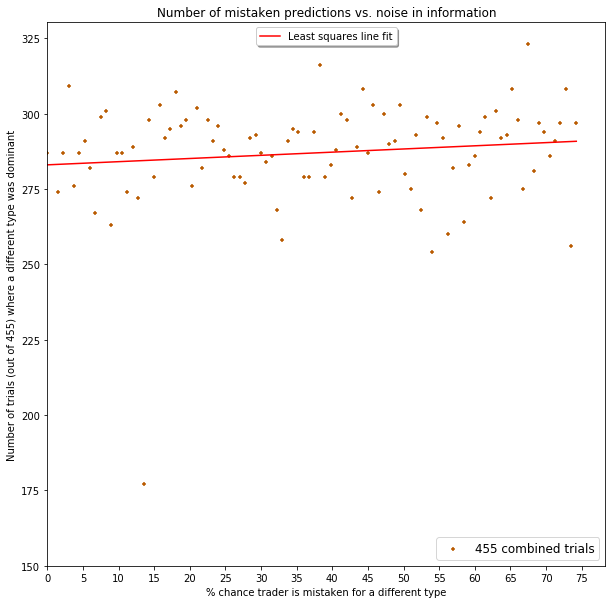

In [27]:
bad_predictions = [x for x,y in zip(enhanced_types, best_trial_types) if x != y]
bad_prediction_ids = []
for i in range(0, len(enhanced_types)):
    if enhanced_types[i]!= best_trial_types[i]:
        bad_prediction_ids.append(i)
bad_prediction_enhanced_profits = [avg_enhanced_profit[x] for x in bad_prediction_ids]
# bad_prediction_all_profits = [avg_all_profit[x] for x in bad_prediction_ids]
# bad_prediction_real_best_profits = [real_best_profit[x] for x in bad_prediction_ids]
diff_after_prediction = [a - b for a,b in zip(real_best_profit, avg_enhanced_profit)]
bad_prediction_diffs =  [diff_after_prediction[x] for x in bad_prediction_ids]
bad_prediction_probs = [(x // 455) * 0.75 for x in bad_prediction_ids]
bad_pred_xs = np.array(np.unique(bad_prediction_probs))
bad_pred_ys = [bad_prediction_probs.count(x) for x in bad_pred_xs]


# lr = LinearRegression(fit_intercept=True)
# linreg_enhanced_list = bad_prediction_diffs.copy()
# linreg_enhanced_array = np.array(linreg_enhanced_list)
# linreg_enhanced_array = linreg_enhanced_array.reshape(-1, 1)
# lr.fit(linreg_enhanced_array, bad_prediction_probs)
# least_squares_coeff = lr.coef_[0]
# coeff_line_x = [0, 75]
# coeff_line_y = [lr.intercept_, lr.intercept_* (1 + least_squares_coeff)]
# print(least_squares_coeff)

linreg_array_x = np.array(bad_pred_xs.copy())
linreg_array_y = np.array(bad_pred_ys.copy())
coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
coeff_line_y = [coeffs[1], coeffs[1] + 75*coeffs[0]]
coeff_line_x = [0, 75-0.75]
print(coeffs[1], coeffs[0])

plt.figure(figsize=(10,10))
plt.xticks(range(0,80,5))
# plt.yticks(np.arange(0, 3, step=0.1))
sc_marker = '+'
sc_marker_size=24
dots = plt.scatter( bad_pred_xs, bad_pred_ys, sc_marker_size, c='#b95a00', marker=sc_marker)
lgnd = plt.legend([dots],  ['455 combined trials'], fontsize = 12, loc='lower right')
plt.title("Number of mistaken predictions vs. noise in information")
plt.ylabel("Number of trials (out of 455) where a different type was dominant")
plt.xlabel("% chance trader is mistaken for a different type")
plt.ylim(bottom=150)
plt.xlim(left=0)
# plt.axes().set_aspect('equal', 'box')
# plt.plot(coeff_line_x, coeff_line_y, c='r')
ax = plt.subplot(111)
ax.plot(coeff_line_x, coeff_line_y, c='r', label='Least squares line fit')
# ax.plot(coeff_line_x, coeff_line_y, label='Dominant strategy average', c="#444444")
# ax.plot(equal_line_x, equal_line_y, label='Line of no improvement',    c='#aaaaaa')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
ax.add_artist(lgnd)
plt.show()